<a href="https://colab.research.google.com/github/busung/machine-learning-practice/blob/main/6_%ED%8A%B8%EB%A6%AC%EC%99%80_CV(%EC%86%8C%EC%9B%A8%EC%9C%B54_6%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 와인 분류


## 데이터 가져오기
* 0 = 화이트, 1 = 레드

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


## 데이터 분리하기
- data vs label
- Random split

In [ ]:
data = wine.iloc[:,0:3].to_numpy()
target = wine.iloc[:,3].to_numpy()

In [ ]:
from sklearn.model_selection import   train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

## 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 학습하기

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

## 평가하기

In [ ]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## 트리를 활용한 분류
1. 장점
* 표준화를 하지 않아도 됨(전처리)
  * 오히려 전처리시 해석이 어려운 면이 있음
* 트리는 해석이 쉬움
2. 단점
* 데이터에 너무 민감함



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


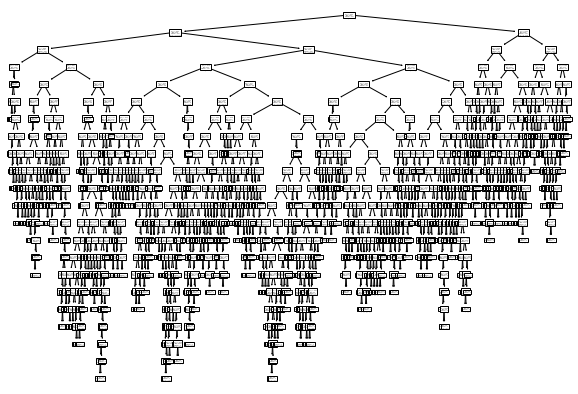

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

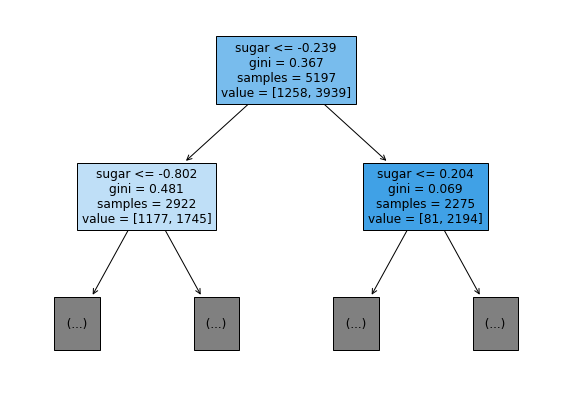

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3,random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

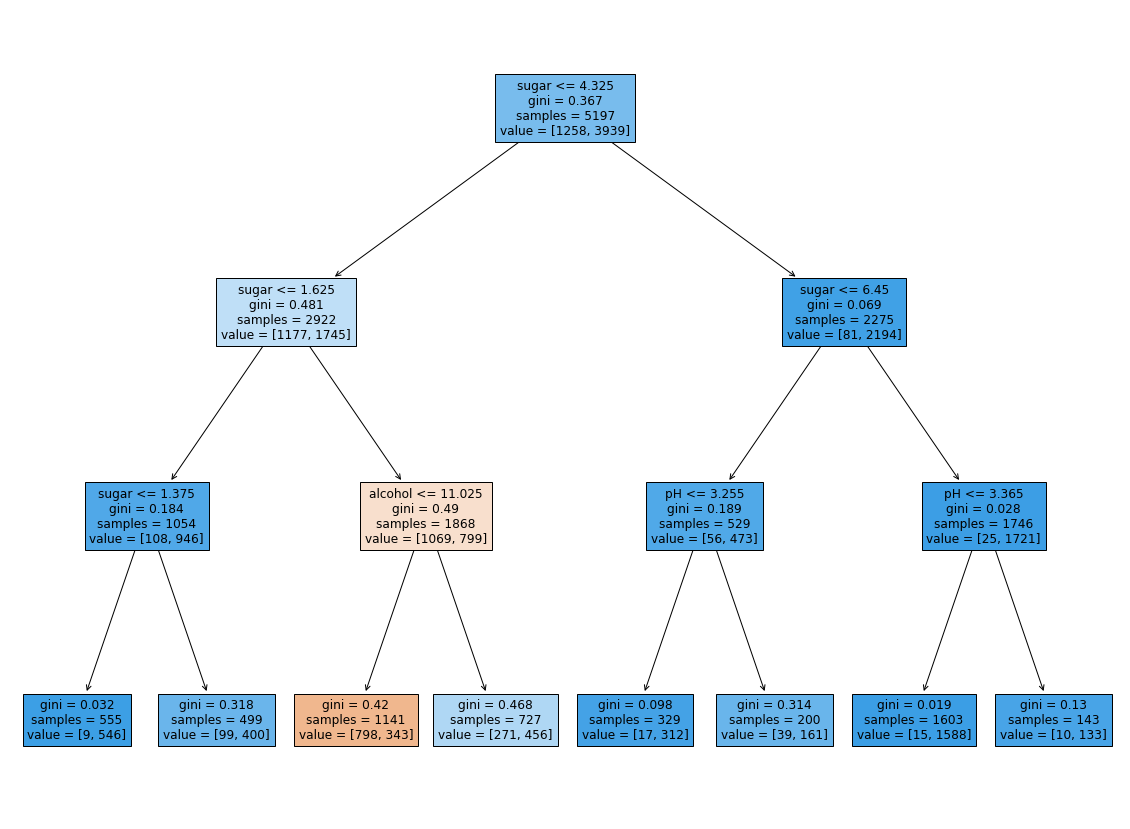

In [ ]:
#sugar가 양수여야 하는데 위에는 음수 이렇게 scaler를 하지 않으니 해석이 더 편함
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 가지치기
* Tree의 오버 피팅을 방지하는 방법

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3,random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


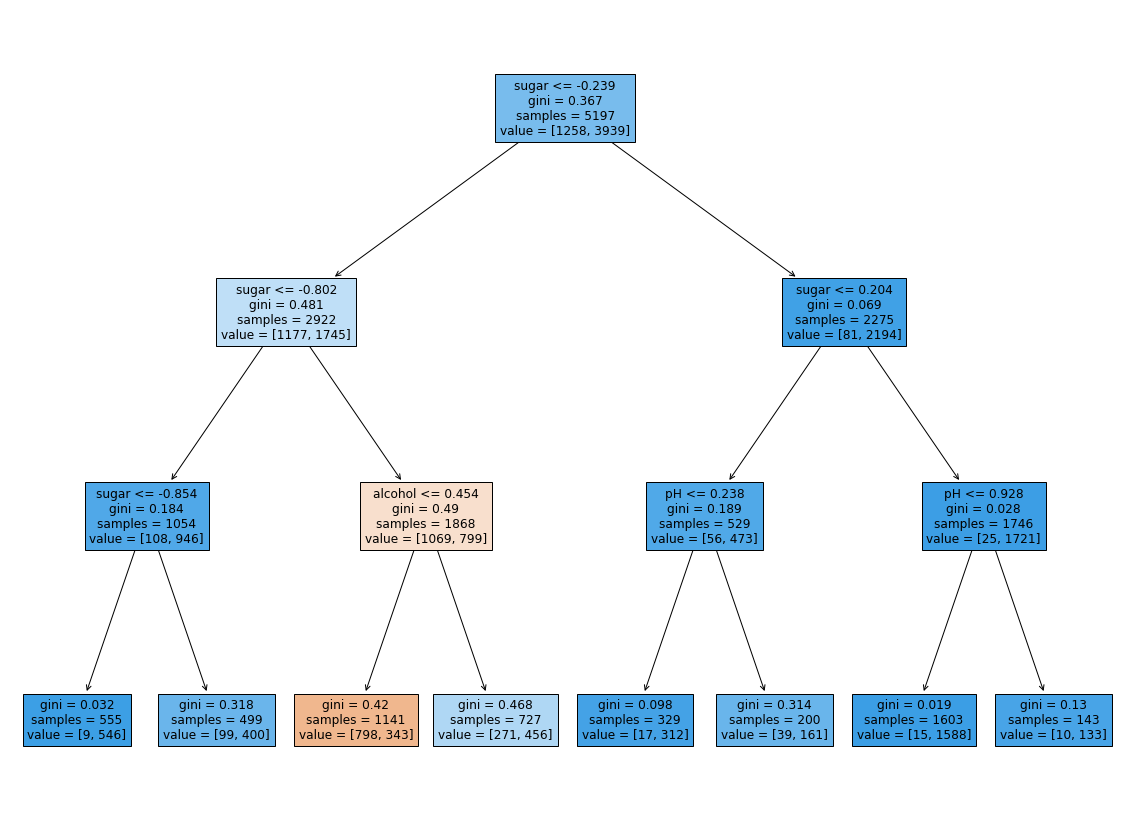

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# IRIS 분류

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
1.0


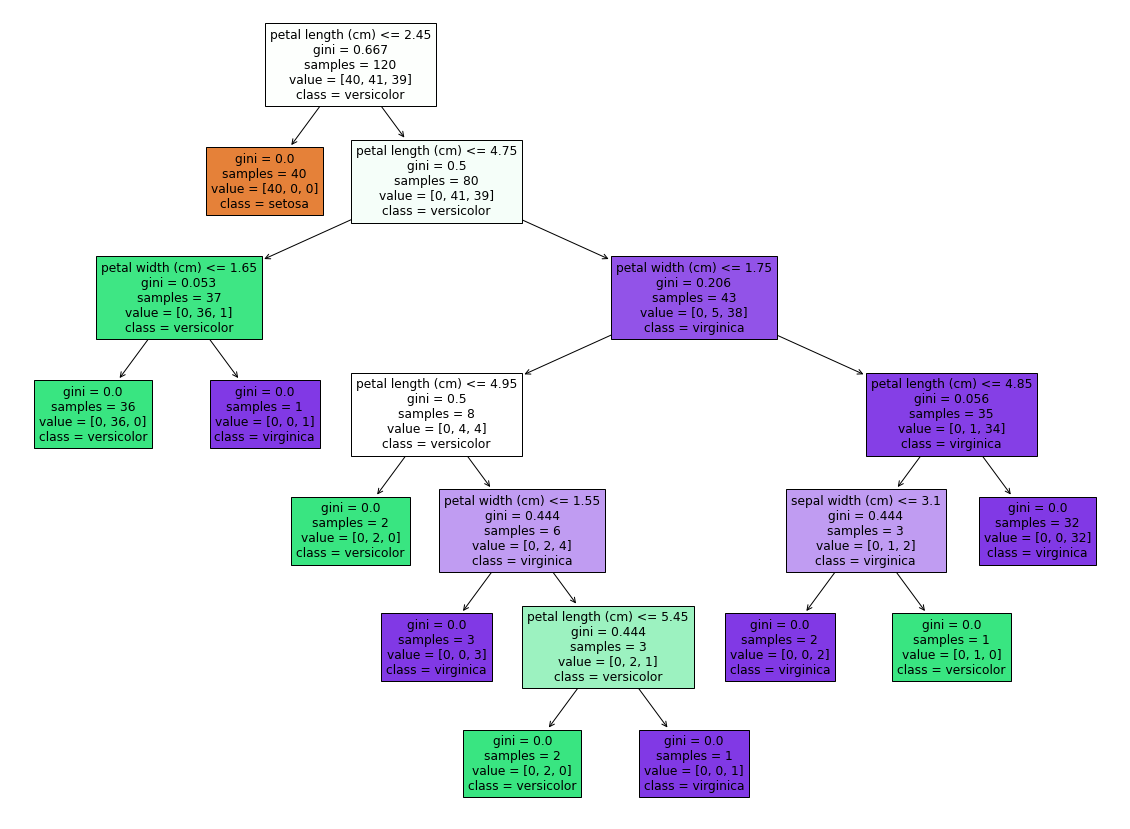

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=iris_data.feature_names, class_names=iris_data.target_names)
plt.show()

# 교차 검증(Cross Validation)
* 데이터에 민감한 트리의 문제를 CV를 통하여 해결


## 원시적인 방법

In [ ]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
print(sub_input.shape, val_input.shape)

(96, 4) (24, 4)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

1.0
0.9166666666666666


## cross_validate 사용

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
1.0


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.0014956 , 0.00135803, 0.00128078, 0.00135517, 0.00127268]), 'score_time': array([0.00058818, 0.00065899, 0.00052857, 0.00043106, 0.00050092]), 'test_score': array([0.95833333, 1.        , 0.83333333, 0.95833333, 0.95833333])}


In [ ]:
import numpy as np
print(np.mean(scores['test_score']))

0.9416666666666668


## StratifiedKFold 사용
* 분류기를 사용, shuffle의 여부와 K의 수를 지정 할 수 있음

In [ ]:
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.9333333333333333
